(1000, 9216) (1000,) 1000
the value of neighborhood hit is  0.46959999999999963


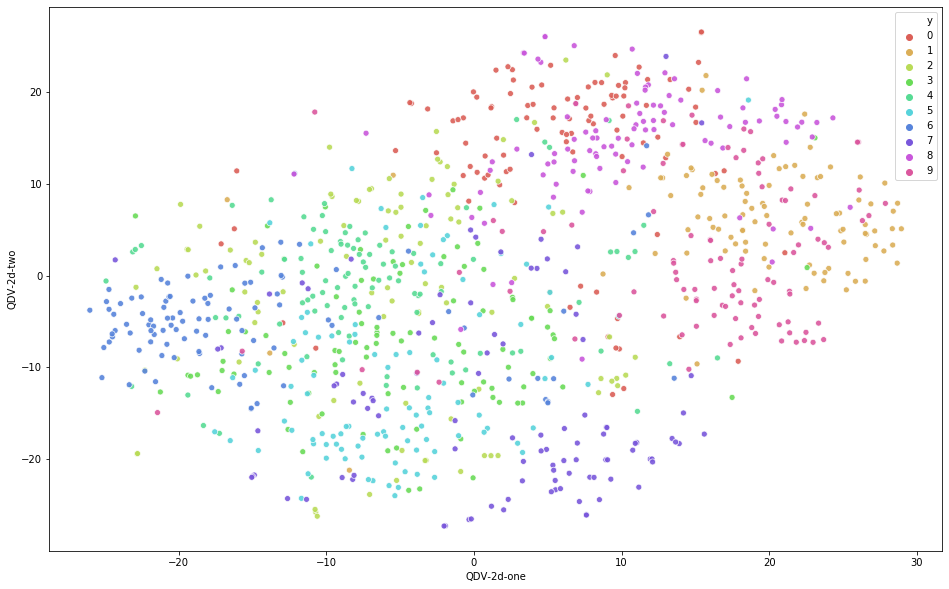

In [15]:
#Xuan wrote
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import sklearn


#Load data
f = open('h5.pckl', 'rb')
X1 = pickle.load(f)
X1 = np.reshape(X1,[X1.shape[0], -1])
f.close()

# f = open('h5.pckl', 'rb')
# X5 = pickle.load(f)
# X5 = np.reshape(X5,[X5.shape[0], -1])
# f.close()

f = open('testY.pckl', 'rb')
Y = pickle.load(f)
f.close()

print(X1.shape,Y.shape,len(Y))

#import pdb; pdb.set_trace()
n_neighbors=6

# normalization method 1
#X5 = sklearn.preprocessing.normalize(X5, norm='l2', axis=1, copy=True, return_norm=False)

# normalization method 2
X1 = (X1-np.min(X1))/(np.max(X1)-np.min(X1))

#transform to pandas dataframe
feat_cols = [ 'feature'+str(i) for i in range(X1.shape[1]) ]
df = pd.DataFrame(X1,columns=feat_cols)
df['y'] = Y
#create anonymous function i.e function having no names using a facility called lambda function
df['label'] = df['y'].apply(lambda i: str(i))

#Apply PCA before TSNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

#Apply T-SNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=3000)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df['QDV-2d-one'] = tsne_pca_results[:,0]
df['QDV-2d-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="QDV-2d-one", y="QDV-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.9
)

#Calculate neighborhood hit
knn_model = NearestNeighbors(n_neighbors).fit(tsne_pca_results)

# import pdb; pdb.set_trace()
nhit = 0.0
for ith in range(len(Y)): 
    current_data_x = tsne_pca_results[ith:ith+1,:]
    distances, indices = knn_model.kneighbors(current_data_x)
    
    ns = indices.flatten().tolist()
    if ith in ns:
       ns.remove(ith)
       current_hit_value = (Y[ns] == Y[ith]).sum()/float(len(ns))
       nhit += current_hit_value    
nhit=nhit/len(Y)
print("the value of neighborhood hit is ", nhit)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install tqdm

In [0]:
#Xiang wrote
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import sklearn

#mnist = fetch_mldata("MNIST original")
#X = mnist.dat / 255.0
#y = mnist.target

#print(X.shape, y.shape)
#[out] (70000, 784) (70000,)

f = open('h1.pckl', 'rb')
X1 = pickle.load(f)
X1 = np.reshape(X1,[X1.shape[0], -1])
f.close()

f = open('h5.pckl', 'rb')
X5 = pickle.load(f)
X5 = np.reshape(X5,[X5.shape[0], -1])
f.close()

# normalize
#X = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)

f = open('testY.pckl', 'rb')
Y = pickle.load(f)
f.close()
# Y = np.concatenate(Y, axis=0)
# Y = np.argmax(Y, axis=1)
print(X1.shape,Y.shape)

#transform to pandas dataframe
feat_cols = [ 'pixel'+str(i) for i in range(X1.shape[1]) ]
df = pd.DataFrame(X1,columns=feat_cols)

df['y'] = Y
df['label'] = df['y'].apply(lambda i: str(i))

df = pd.DataFrame.from_dict({
    'y': Y,
    'label': [str(y_i) for y_i in Y]
})


#pure PCA: from the original 784 dimensions generate the first three principal components
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(X)
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.9
)

#Apply PCA before TSNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X5)
#print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
#[out] Cumulative explained variation for 50 principal components: 0.8267618822147329

#TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=10, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset = pd.DataFrame.from_dict({
    'tsne-2d-one': tsne_pca_results[:,0],
    'tsne-2d-two': tsne_pca_results[:,1],
    'y': Y
})

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.9
)

FileNotFoundError: ignored

In [0]:
import pickle
# f = open('h1.pkl', 'rb')
# X1 = pickle.load(f)
# X2 = pickle.load(f)
# print(X1.shape)
# print(X2.shape)

h1=[]
with open('h1.pkl', 'rb') as f:
    while True:
        try:
            h1.append(pickle.load(f))
        except EOFError:
            break